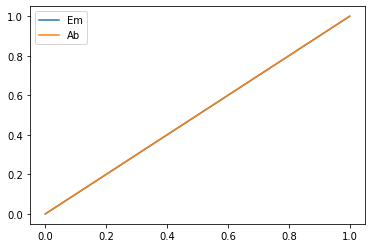

k:  1 N: 2
Internal average: 0.500 0.500
Simpson:  0.5 0.5
Romb:  0.5 0.5
Internal Romberg:  0.5 0.5
[0. 1.]
[0. 1.]
[0. 1.]


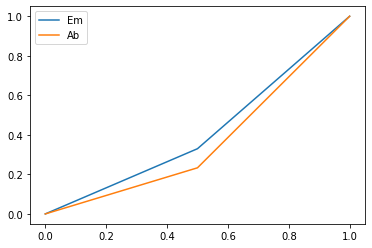

k:  2 N: 3
Internal average: 0.443 0.411
Simpson:  0.3865846518540174 0.3221721652474152
Romb:  0.3865846518540174 0.32217216524741527
Internal Romberg:  0.3865846518540174 0.3221721652346128
[0.  0.5 1. ]
[0.         0.32987698 1.        ]
[0.         0.23325825 1.        ]


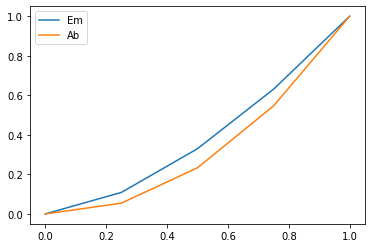

k:  3 N: 5
Internal average: 0.414 0.367
Simpson:  0.38495235951115 0.3225289889181885
Romb:  0.3848435400216256 0.32255277716290676
Internal Romberg:  0.3848435400949223 0.3225527771270598
[0.   0.25 0.5  0.75 1.  ]
[0.         0.10881882 0.32987698 0.63109977 1.        ]
[0.         0.05440941 0.23325825 0.54654843 1.        ]


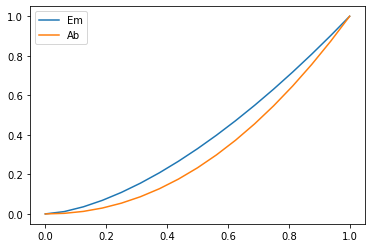

k:  5 N: 17
Internal average: 0.392 0.334
Simpson:  0.38462474096531674 0.3225798946772019
Romb:  0.3846209910965889 0.3225803197246206
Internal Romberg:  0.38462099111105197 0.3225803197140219
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ]
[0.         0.01184154 0.03589682 0.06867553 0.10881882 0.15551061
 0.20818528 0.26641881 0.32987698 0.39828692 0.47142003 0.54908088
 0.63109977 0.71732735 0.80763082 0.90189098 1.        ]
[0.         0.00296038 0.01269144 0.02973738 0.05440941 0.08693308
 0.12748693 0.17621948 0.23325825 0.29871519 0.37269025 0.45527382
 0.54654843 0.64659014 0.75546946 0.87325218 1.        ]


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson, romb

def foo(k):
    # Calculate
    executable = "../build/averageangle_test"
    options = " -e_b 0.01 -e_e 0.1 -p 2.2 -nu 1e9 -electron_fraction 1 -M 2.9e22 -L 2.6e15 -e_th 0.3 -r 1 -k %i" %k
    res = os.popen(executable+options).readlines()
    #print(os.popen(executable+options).read())
    output = res[1:-2]
    avge, avga = res[-2].split()[1:]
    inte, inta = res[-1].split()[2:]
    # Load
    O = np.loadtxt(output).T
    angle = O[0]
    cos = O[1]
    em = O[2]
    ab = O[3]
    # Graph
    
    plt.plot(cos, em/em[-1], label='Em')
    plt.plot(cos, ab/ab[-1], label='Ab')
    plt.legend()
    plt.show()
    
    dx = cos[1]-cos[0]
    print('k: ', k,'N:', 1+2**(k-1))
    print('Internal average: %.3f %.3f' % (float(avge)/em[-1], float(avga)/ab[-1]))
    print('Simpson: ', simpson(em,cos)/em[-1], simpson(ab,cos)/ab[-1])
    print('Romb: ', romb(em,dx)/em[-1], romb(ab,dx)/ab[-1])
    print('Internal Romberg: ', float(inte)/em[-1], float(inta)/ab[-1])
    
    print(cos)
    print(em/em[-1])
    print(ab/ab[-1])
foo(1)
foo(2)
foo(3)
foo(5)